In [1]:
#importations
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from matplotlib.pyplot import figure


In [2]:
df_cleaned = pd.read_csv('Recoded-Race.csv')
df_cleaned.head()
#list all ICD 10 codes
df_cleaned["Race-Simplified"].value_counts()

White                        73173
Black                        29165
Hispanic                      9846
American Indian               1169
Asian                         1051
Asian or Pacific Islander      661
Name: Race-Simplified, dtype: int64

In [3]:
#create list of ICD 10 codes associated with suicide
suicide_guns = ['X74', 'X73', 'X72']
#create an expression that has each ICD10 as a possible condition
suicide_guns_regex = '|' .join(suicide_guns)

In [4]:
df_suicide = df_cleaned[df_cleaned['ICD10'].str.contains(suicide_guns_regex)]
#visualize our value counts to show that the data worked
df_suicide['ICD10'].value_counts()
df_suicide.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Resident_Status', 'Month_Of_Death',
       'Sex', 'Age', 'Age_Group', 'Place_Of_Death', 'Marital_Status',
       'DOW_of_Death', 'Data_Year', 'Injured_At_Work', 'Manner_Of_Death',
       'Activity_Code', 'Place_Of_Causal_Injury', 'Race', 'Hispanic_Origin',
       'Causes_of_Death', 'ICD10', 'Race-Simplified', 'ICD10-Description'],
      dtype='object')

In [5]:
#group by year and Race, resetting index to keep column names available
suicide_year_cat = df_suicide.groupby(['Data_Year', 'Race']).count().reset_index()
#rename column
suicide_year_cat = suicide_year_cat.rename(columns={"Unnamed: 0": "Number of Deaths"})

In [6]:
#visualize data
suicide_year_cat

df_suicide_total = df_suicide.groupby(['Data_Year']).count().reset_index()
df_suicide_total = df_suicide_total.rename(columns = {'Unnamed: 0' : 'Number of Deaths'})

In [7]:
#visualize dataframe without grouping
df_suicide_total.columns

Index(['Data_Year', 'Number of Deaths', 'Unnamed: 0.1', 'Resident_Status',
       'Month_Of_Death', 'Sex', 'Age', 'Age_Group', 'Place_Of_Death',
       'Marital_Status', 'DOW_of_Death', 'Injured_At_Work', 'Manner_Of_Death',
       'Activity_Code', 'Place_Of_Causal_Injury', 'Race', 'Hispanic_Origin',
       'Causes_of_Death', 'ICD10', 'Race-Simplified', 'ICD10-Description'],
      dtype='object')

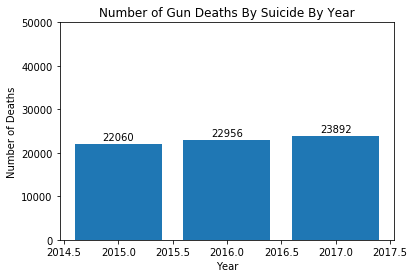

In [69]:
#create axis

x_axis = df_suicide_total['Data_Year']
y_axis = df_suicide_total['Number of Deaths']
colors = np.array(["blue"])

fig, ax = plt.subplots()
def autolabel(rects):
   
   for rect in rects:
       height = rect.get_height()
       ax.annotate('{}'.format(height),
                   xy=(rect.get_x() + rect.get_width() / 2, height),
                   xytext=(0, 2),  # 3 points vertical offset
                   textcoords="offset points",
                   ha='center', va='bottom')
rect=ax.bar(x_axis, y_axis, color='r', width=0.35 , align="center")
autolabel(rect)


# Plot
plt.bar(x_axis, y_axis)
plt.title('Number of Gun Deaths By Suicide By Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.ylim(bottom = 0, top = 50000)
fig = plt.gcf()
fig.set_size_inches(6, 4, forward=True)
fig.savefig("Gun-deaths-suicide.png", dpi =200)


In [9]:
#conduct Chi-Square with the years of the biggest difference
# Observed data in a (hypothetical) year where deaths are the same for each year
total = df_suicide_total["Number of Deaths"].sum()
deaths_by_year = df_suicide_total["Number of Deaths"]
print (total)
observed = pd.Series([deaths_by_year[0], deaths_by_year[1], deaths_by_year[2]], index=["2015", "2016", "2017"])
df = pd.DataFrame([observed]).T
df[1] = total/3
df.columns = ["observed", "expected"]
critical_value = stats.chi2.ppf(q = 0.95, df = 2)

# Run the chi square test with stats.chisquare()
stats.chisquare(df['observed'], df['expected'])
#we can conlcude based on a chi-square test that the number of deaths by suicide has increased and is
#statistically significant

68908


Power_divergenceResult(statistic=73.07041272421199, pvalue=1.3581929809779631e-16)

In [10]:
#pivot table for breakdown by ICD10 code
suicide_year_cat = df_suicide.groupby(['Data_Year', 'Race-Simplified']).count().reset_index()
suicide_year_cat.columns
#drop unnecessary frames
suicide_year_cat = suicide_year_cat.drop(['Month_Of_Death', 'Resident_Status', 'Sex', 'Age', 'Age_Group', 'Place_Of_Death', 
                                          'Marital_Status', 'DOW_of_Death', 'Injured_At_Work', 'Manner_Of_Death' ,'Activity_Code',  'Place_Of_Causal_Injury' ,'Hispanic_Origin', 'Causes_of_Death', 'ICD10'], axis=1)
suicide_year_cat
race_pivot = suicide_year_cat.pivot(index = "Data_Year", columns="Race-Simplified").reset_index()
race_pivot = race_pivot.rename(columns={"Unnamed: 0": "Number of Deaths"})
race_pivot["Number of Deaths"]

Race-Simplified  American Indian  Asian  Asian or Pacific Islander  Black  \
0                            200    213                         81   1142   
1                            204    219                        120   1361   
2                            232    234                        140   1457   

Race-Simplified  Hispanic  White  
0                    1053  19371  
1                    1136  19916  
2                    1233  20596

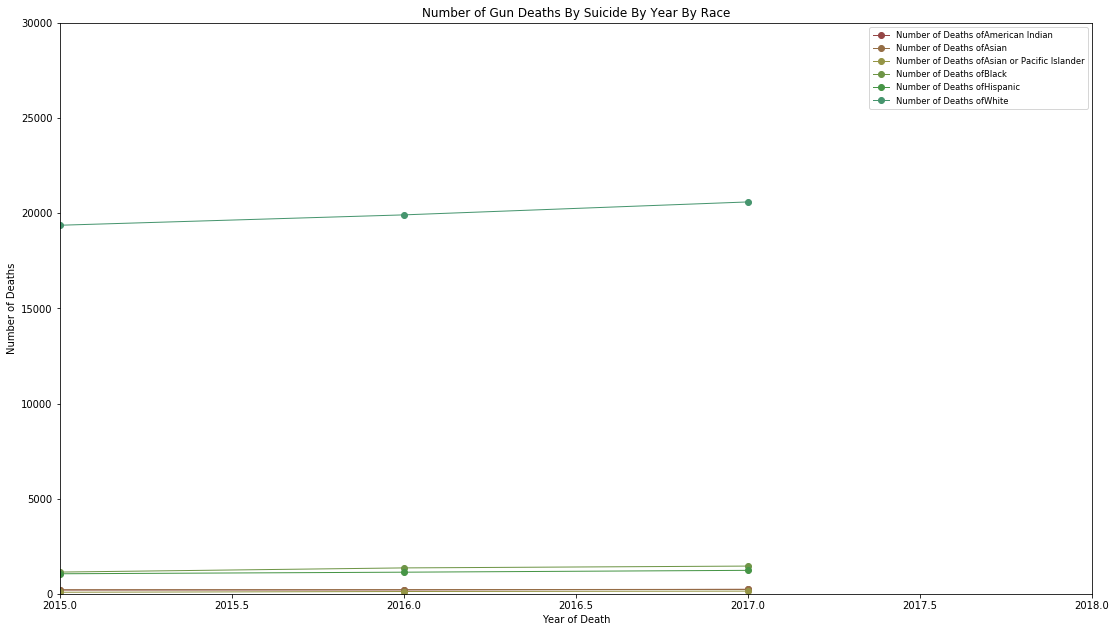

<Figure size 48000x24000 with 0 Axes>

In [70]:
#plot line graph for total number of deaths, then broken down by Race

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]



races = ['American Indian',
         'Asian',
         'Asian or Pacific Islander',
         'Black',
        'Hispanic',
         'White']

colors = ['#954646', 
          '#956E46',
          '#959546',
          '#6E9546',
         '#469546',
         '#46956E']

descriptions = ['American Indian',
                 'Asian',
                 'Asian or Pacific Islander',
                 'Black',
                 'Hispanic',
                 'White']


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 30000)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs and plot with corresponding color using zip function
for race, color, description in zip(races, colors, descriptions):

    #get number of deaths for each code
    death_race = race_pivot['Number of Deaths'][race].tolist()
    #generate legend description 
    description = "Number of Deaths of" + str(description) 
    #create actual plot
    plt.plot(timepoints, death_race, linewidth=1, color = color, label=description, marker='o')
    
    
plt.title('Number of Gun Deaths By Suicide By Year By Race')
plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=300, facecolor='w', edgecolor='k')

plt.show()
fig.savefig("Gun-deaths-suicide-race.png", dpi =200)

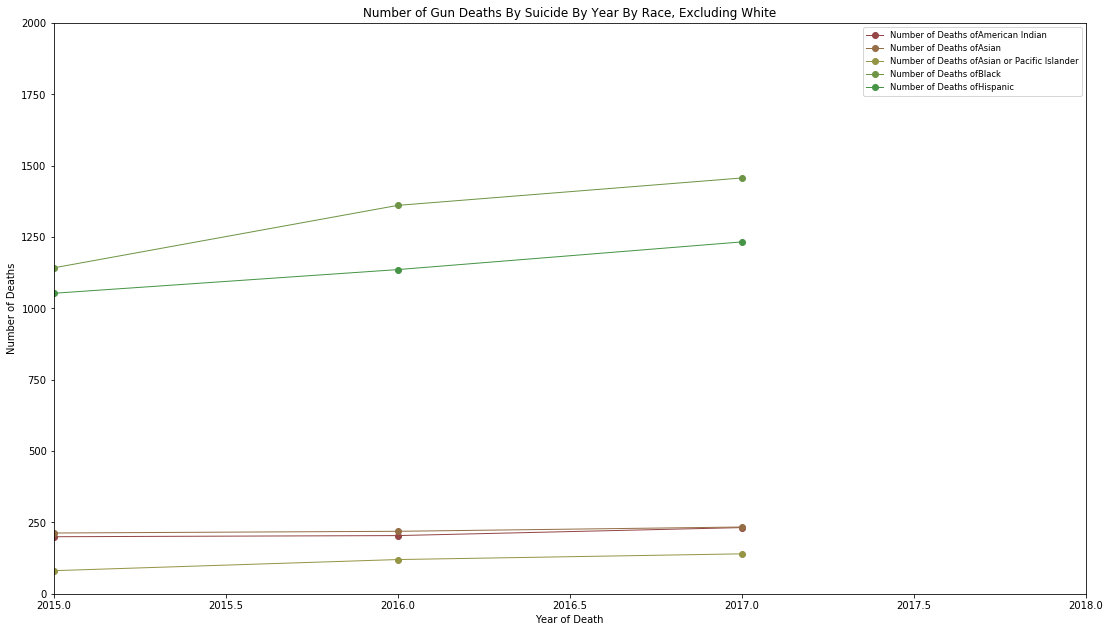

<Figure size 48000x24000 with 0 Axes>

In [71]:
#same graph but without white ethnicity
#plot line graph for total number of deaths, then broken down by Race

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]



races = ['American Indian',
         'Asian',
         'Asian or Pacific Islander',
         'Black',
        'Hispanic',]

colors = ['#954646', 
          '#956E46',
          '#959546',
          '#6E9546',
         '#469546',]

descriptions = ['American Indian',
                 'Asian',
                 'Asian or Pacific Islander',
                 'Black',
                 'Hispanic',]


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Number of Deaths")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 2000)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs and plot with corresponding color using zip function
for race, color, description in zip(races, colors, descriptions):

    #get number of deaths for each code
    death_race = race_pivot['Number of Deaths'][race].tolist()
    #generate legend description 
    description = "Number of Deaths of" + str(description) 
    #create actual plot
    plt.plot(timepoints, death_race, linewidth=1, color = color, label=description, marker='o')
    
    
plt.title('Number of Gun Deaths By Suicide By Year By Race, Excluding White')
plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=300, facecolor='w', edgecolor='k')
fig.savefig("Gun-deaths-suicide-race-no-white.png", dpi =200)
plt.show()

In [13]:
race_pivot

Data_Year Number of Deaths                                  \
Race-Simplified            American Indian Asian Asian or Pacific Islander   
0                    2015              200   213                        81   
1                    2016              204   219                       120   
2                    2017              232   234                       140   

                                         Unnamed: 0.1        \
Race-Simplified Black Hispanic  White American Indian Asian   
0                1142     1053  19371             200   213   
1                1361     1136  19916             204   219   
2                1457     1233  20596             232   234   

                                           ...                      Race  \
Race-Simplified Asian or Pacific Islander  ... Asian or Pacific Islander   
0                                      81  ...                        81   
1                                     120  ...                       120   
2                                     140  ...                       140   

                                      ICD10-Description        \
Race-Simplified Black Hispanic  White   American Indian Asian   
0                1142     1053  19371               200   213   
1                1361     1136  19916               204   219   
2                1457     1233  20596               232   234   

                                                                 
Race-Simplified Asian or Pacific Islander Black Hispanic  White  
0                                      81  1142     1053  19371  
1                                     120  1361     1136  19916  
2                                     140  1457     1233  20596  

[3 rows x 25 columns]

In [49]:
#to compare the death rates better, we will calculate the crude death rates per 100k people for the top three largest categories,
#the top three largest counts are white, black, and hispanic
#data source: https://factfinder.census.gov/faces/tableservices/jsf/pages/productview.xhtml?pid=ACS_12_1YR_DP05&prodType=table

#create dictionary of race and population
data = {'Race': ['White-Alone', 'Black', 'Hispanic'], 'Pop-2015': [197534496, 39597600, 56496122],}
pop_2016 = [197479450, 39717127, 57398719]
pop_2017 = [197285202, 40129593, 58846134]
df_rates = pd.DataFrame(data) 
df_rates["Pop-2016"] = pop_2016
df_rates["Pop-2017"] = pop_2017
deaths_15 = ['19371', '1142', '1053']
deaths_16 = ['19916', '1361', '1136']
deaths_17 = ['20596', '1457', '1233']

df_rates["Deaths-15"] = deaths_15
df_rates["Deaths-16"] = deaths_16
df_rates["Deaths-17"] = deaths_17

df_rates["Rate-15"] = 100000 * df_rates["Deaths-15"].astype(int) / df_rates["Pop-2015"].astype(int)
df_rates["Rate-16"] = 100000 * df_rates["Deaths-16"].astype(int) / df_rates["Pop-2016"].astype(int)
df_rates["Rate-17"] = 100000 * df_rates["Deaths-17"].astype(int) / df_rates["Pop-2017"].astype(int)
df_rates

Race   Pop-2015   Pop-2016   Pop-2017 Deaths-15 Deaths-16 Deaths-17  \
0  White-Alone  197534496  197479450  197285202     19371     19916     20596   
1        Black   39597600   39717127   40129593      1142      1361      1457   
2     Hispanic   56496122   57398719   58846134      1053      1136      1233   

    Rate-15    Rate-16    Rate-17  
0  9.806388  10.085100  10.439708  
1  2.884013   3.426733   3.630737  
2  1.863845   1.979138   2.095295

In [57]:
df_rates
rates_white = df_rates.values.tolist()[0][7:10]
rates_black = df_rates.values.tolist()[1][7:10]
rates_hispanic = df_rates.values.tolist()[2][7:10]
rates_hispanic

[1.8638447431843197, 1.9791382452280861, 2.095294824295509]

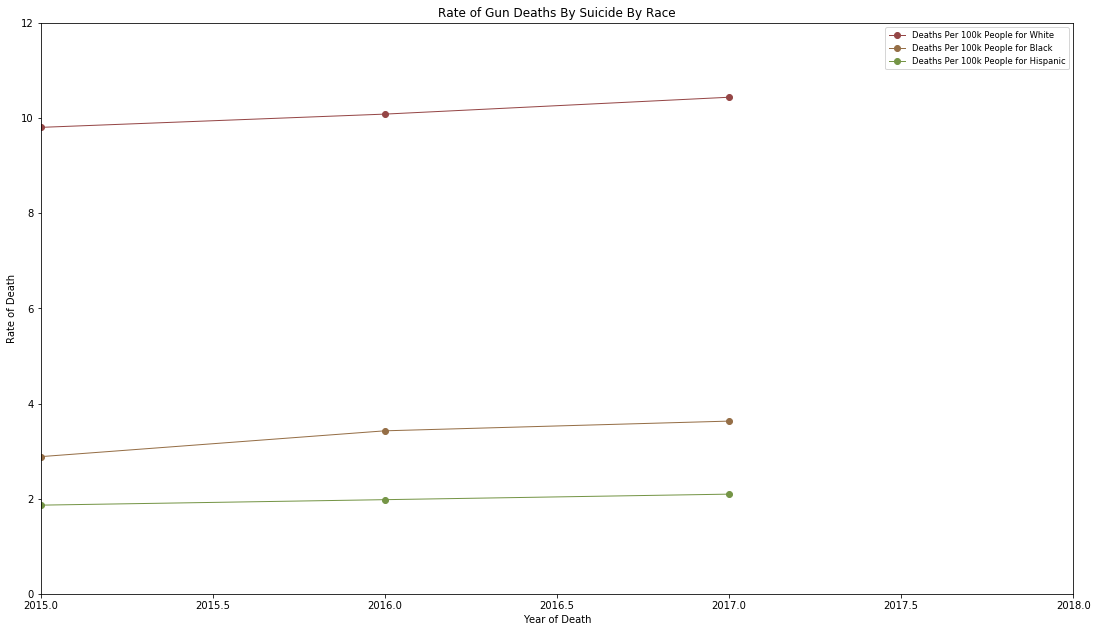

<Figure size 48000x24000 with 0 Axes>

In [72]:
#same graph but without white ethnicity
#plot line graph for total number of deaths, then broken down by Race

# Generate the Plot (with Error Bars)
fig, ax = plt.subplots()

#create timepoints list 
timepoints = [2015, 2016, 2017]



races = ['White',
         'Black',
        'Hispanic']

colors = ['#954646', 
          '#956E46',
          '#759546']

descriptions = ['White',
         'Black',
        'Hispanic']


#set figure size, limits, and labels
ax.set_xlabel("Year of Death")
ax.set_ylabel("Rate of Death")
ax.set_xlim(2015, 2018)
ax.set_ylim(0, 12)
fig.set_size_inches(18.5, 10.5, forward=True)



#loop through list of each drugs with iterator variable
for i in range(0,3):

    #get number of deaths for each code
    death_race = rates_white = df_rates.values.tolist()[i][7:10]
    #generate legend description 
    description = "Deaths Per 100k People for " + str(descriptions[i]) 
    #create actual plot
    plt.plot(timepoints, death_race, linewidth=1, color = colors[i], label=description, marker='o')
    
    
plt.title('Rate of Gun Deaths By Suicide By Race')
plt.legend(loc="best", fontsize="small", fancybox=True)
figure(num=None, figsize=(160, 80), dpi=300, facecolor='w', edgecolor='k')
fig.savefig("Gun-deaths-suicide-rates-top-3.png", dpi =200)
plt.show()

In [86]:
#two sample t test for whites vs black and white vs hispanic
# Note: Setting equal_var=False performs Welch's t-test which does 
# not assume equal population variance
result = stats.ttest_ind(rates_white, rates_hispanic, equal_var=False)
result_2 = stats.ttest_ind(rates_white, rates_black, equal_var=False)

print (f"The test for white death rate vs hispanic death rate is statistically significant{result}")
print (f"The test for white death rate vs black death rate is statistically significant{result_2}")

The test for white death rate vs hispanic death rate is statistically significantTtest_indResult(statistic=0.0, pvalue=1.0)
The test for white death rate vs black death rate is statistically significantTtest_indResult(statistic=-5.7361192539804104, pvalue=0.019696985270141125)
